In [1]:
# %pip install xlrd

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

In [5]:
data = pd.read_excel("notExercise.xls")

In [6]:
data

,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
0,2017,서울시,서울시,49.7,8.1,5.8,34.7,1.7
1,2017,성별,남자,55.2,7.9,5.5,29.8,1.6
2,2017,성별,여자,45.0,8.3,6.0,38.8,1.8
3,2017,연령별,10대,55.7,6.1,5.6,32.2,0.3
4,2017,연령별,20대,54.8,6.9,5.2,32.9,0.1
5,2017,연령별,30대,58.1,5.5,4.6,31.6,0.2
6,2017,연령별,40대,57.7,6.8,5.2,29.4,1
7,2017,연령별,50대,50.1,9.2,7.2,32.2,1.4
8,2017,연령별,60대 이상,27.5,12.8,6.9,46.8,6
9,2017,학력별,중졸 이하,26.1,13.7,6.6,46.2,7.4


In [10]:
tmp_list = []
for item in data["대분류"].unique():
    if not item.endswith("구"):
        tmp_list.append(item)
tmp_list.append("지역소분류")
category = {i + 1: item for i, item in enumerate(tmp_list)}
category

{1: '서울시',
 2: '성별',
 3: '연령별',
 4: '학력별',
 5: '소득별',
 6: '혼인상태별',
 7: '지역대분류',
 8: '지역소분류'}

In [ ]:
g_data = data[data["대분류"] == category[2]]
g_data = g_data.iloc[:,2:]
g_data

Text(0.5, 1.0, '운동을 할 충분한 시간이 없어서')

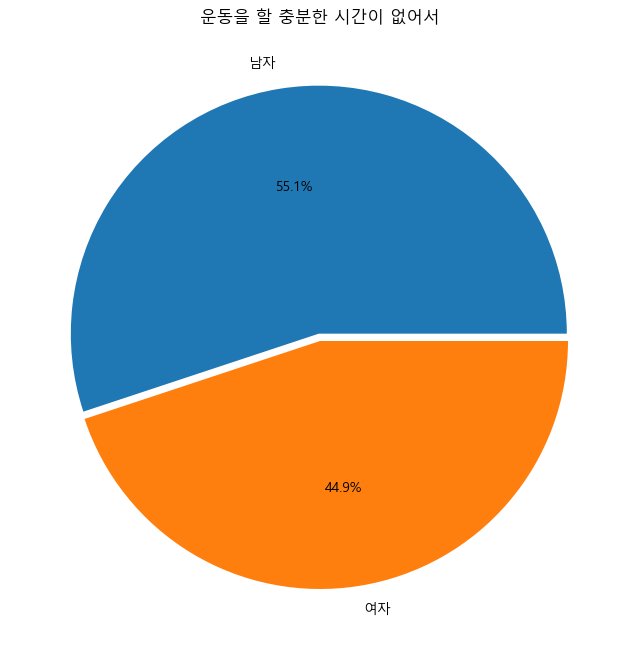

In [44]:
plt.figure(figsize=(8,12))
plt.pie(g_data.iloc[:,1],labels=g_data.loc[:,"분류"],autopct='%.1f%%',explode=(0.03,0))
plt.title(g_data.columns[1])

In [72]:
def choose_category(cate_num):
    g_data = data[data["대분류"] == category[cate_num]]
    g_data = g_data.iloc[:,2:]
    g_data
# def draw_pie():
    explode_tuple = (0.015,) * (len(g_data.index))
    plt.figure(figsize=(8,12))
    for i in range(1, len(g_data.columns)):
        plt.subplot(3,2,i)
        plt.pie(g_data.iloc[:,i],labels=g_data.loc[:,"분류"],autopct='%.1f%%',explode=explode_tuple)
        plt.title(g_data.columns[i])
    plt.show()

In [ ]:
choose_category(7)

In [ ]:
# choose_category로 전체 타이틀 작성
# pie 그래프 외에 다른 그래프 함수도 만들기
# 세세한 작업 가능하게끔 하기
# try except로 예외 처리하기